### Simualting BlackJack

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from blackjack import Game

In [10]:
game = Game(1, 100, 1, 8, "warning")
xlist = list()
# keep playing as long as money is above 80
while game.players[0].money > 80:
    # keep playing if there is card
    if game.index < game.cut_card and game.index < game.deck_length:
        game.round += 1
        if game.play_round():
            xlist.append(game.players[0].money)
        else:
            game = Game(1, game.players[0].money, 1, 8, "warning")
    else:
        game = Game(1, game.players[0].money, 1, 8, "warning")

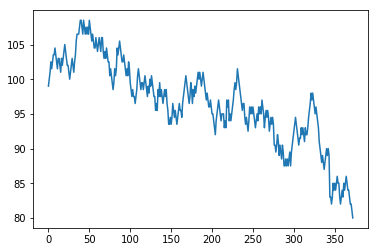

In [11]:
plt.plot(xlist)